In [1]:
import os
from utils import create_tiles, data_augmentation_pipeline, load_psf
import pandas as pd
from tqdm import tqdm

In [2]:
train_path = "../data/train/"
val_path = "../data/val/"

train_output_path = os.path.join(train_path, "original_data/")
val_output_path = os.path.join(val_path, "original_data/")

In [3]:
jp2_images_dir_path = "../Pleiades images/jp2"
# jp2_images_dir_path = train_output_path = "../SOTA/images"
if jp2_images_dir_path == "../SOTA/images":
    train_path = "../data/SOTA"

train_perc = 0.8
val_perc = 1 - train_perc

all_images = sorted(os.listdir(jp2_images_dir_path))[1: ]
n_train = round(train_perc * len(all_images))
n_val = round(val_perc * len(all_images))

print(f'Number of train images: {n_train}')
print(f'Number of validation images: {n_val}')

train_images_paths = all_images[: n_train]
val_images_paths = all_images[n_train: ]

Number of train images: 58
Number of validation images: 14


In [4]:
if not jp2_images_dir_path == "../SOTA/images":
    for image_path in tqdm(train_images_paths):
        if image_path != ".DS_Store":
            full_path_to_image = os.path.join(jp2_images_dir_path, image_path)
            create_tiles(path_to_image=full_path_to_image, output_folder=train_output_path, tile_size=2048, save_metadata=False)       

    for image_path in tqdm(val_images_paths):
        if image_path != ".DS_Store":
            full_path_to_image = os.path.join(jp2_images_dir_path, image_path)
            create_tiles(path_to_image=full_path_to_image, output_folder=val_output_path, tile_size=2048, save_metadata=False)

 72%|███████▏  | 42/58 [3:03:11<36:48, 138.04s/it]  

IMG_PHR1B_PMS_201507020946121_ORT_1582933101-001_R2C1


100%|██████████| 14/14 [1:13:02<00:00, 313.04s/it]


In [4]:
if jp2_images_dir_path == "../SOTA/images":
    psf_path = "../psf/1024/"
    psf = load_psf(psf_path, sigma_x=5, sigma_y=5, eta=0)

    downscale_factor = 2

    data_augmentation_pipeline(path_to_data=train_output_path, psf=psf, path_to_panchrom=os.path.join(train_path, "pan"), path_to_pansharp=os.path.join(train_path, "sharp"), path_to_rgb=os.path.join(train_path, "rgb"), downscale_factor=downscale_factor)

else:
    psf_path = "../psf"
    psf = load_psf(psf_path, sigma_x=5, sigma_y=5, eta=0)

    downscale_factor = 5

    data_augmentation_pipeline(path_to_data=train_output_path, psf=psf, path_to_panchrom=os.path.join(train_path, "pan"), path_to_pansharp=os.path.join(train_path, "sharp"), path_to_rgb=os.path.join(train_path, "rgb"), downscale_factor=downscale_factor)
    data_augmentation_pipeline(path_to_data=val_output_path, psf=psf, path_to_panchrom=os.path.join(val_path, "pan"), path_to_pansharp=os.path.join(val_path, "sharp"), path_to_rgb=os.path.join(val_path, "rgb"), downscale_factor=downscale_factor)


 50%|█████     | 4147/8212 [10:09<09:57,  6.81it/s]  


KeyboardInterrupt: 

100
1.0
4095
1.0
4095
1.0
1881
1.0
4095
1.0
4095
1.0
4095
1.0
4095
1.0
2193
1.0


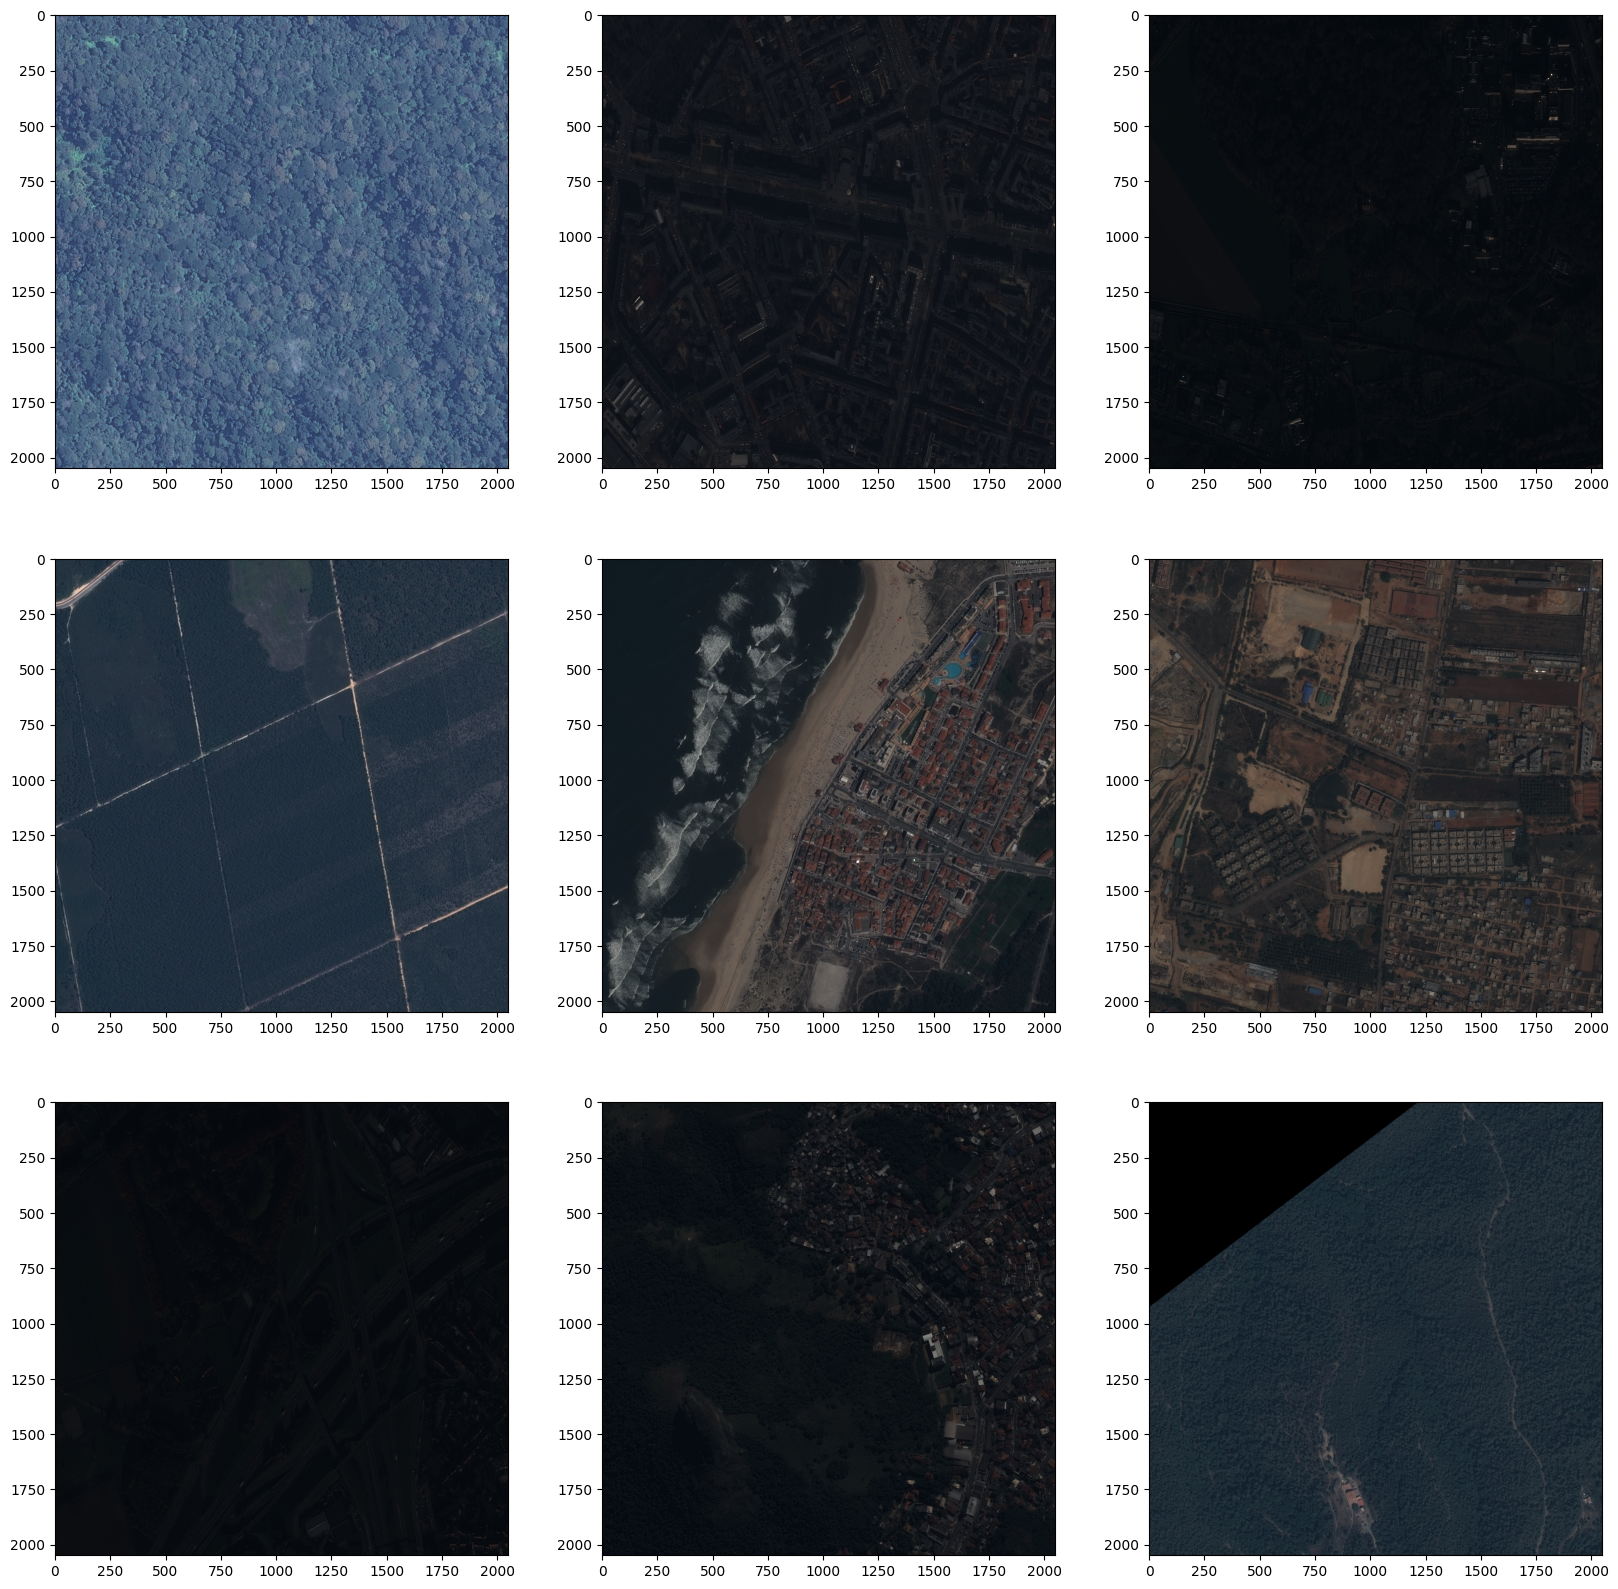

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

i = 0
plt.figure(figsize=(20, 20))
while i < 9:
    image = np.random.choice(os.listdir(train_output_path))
    if image[-3:] != "xml":
        i += 1
        plt.subplot(3, 3, i)
        tile = cv2.imread(os.path.join(train_output_path, image), cv2.IMREAD_UNCHANGED)
        tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
        print(np.amax(tile))
        plt.imshow(tile / np.amax(tile))
        print(np.amax(tile / np.amax(tile)))
plt.show()

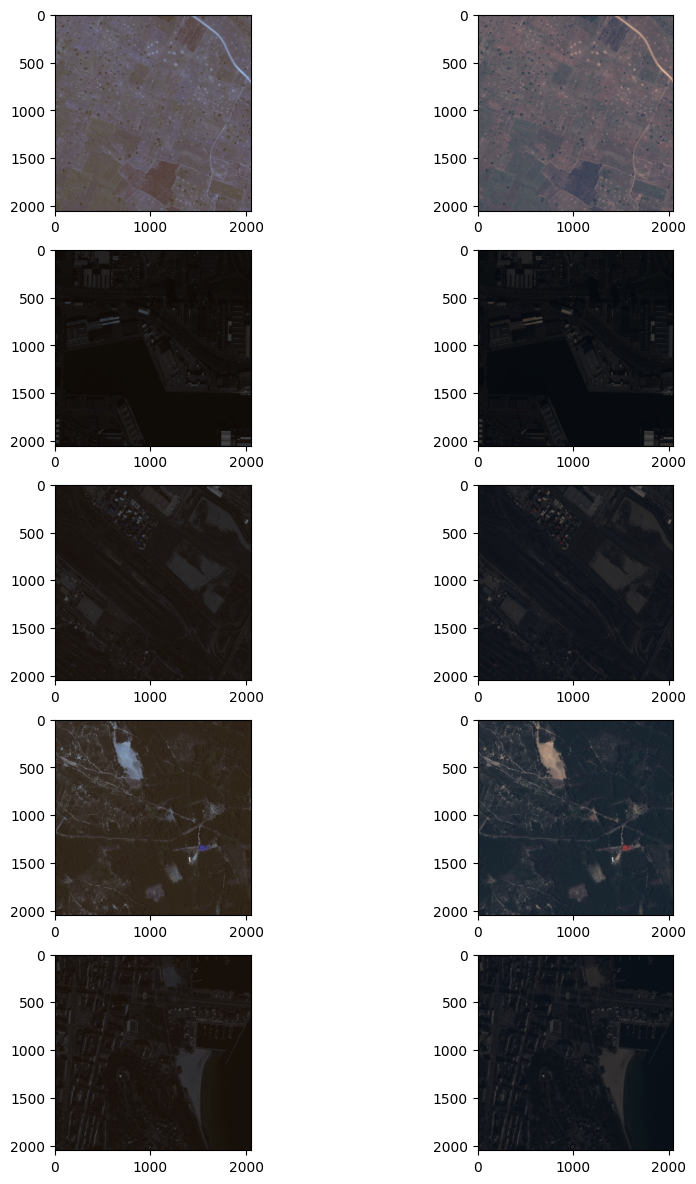

In [10]:
i = 0
plt.figure(figsize=(10, 30))
while i < 9:
    image = np.random.choice(os.listdir(train_output_path))
    if image[-3:] != "xml":
        i += 1
        plt.subplot(10, 2, i)
        tile = cv2.imread(os.path.join(train_output_path, image), cv2.IMREAD_UNCHANGED)
        tile_rgb = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
        plt.imshow(tile / np.amax(tile))
        
        i += 1
        plt.subplot(10, 2, i)
        plt.imshow(tile_rgb / np.amax(tile_rgb))
plt.show()

(410, 410, 3)
15
(410, 410, 3)
4
(410, 410, 3)
0
(410, 410, 3)
15
(410, 410, 3)
15


/var/folders/rl/1fh7gb451_zbkypflb1hccxh0000gn/T/ipykernel_6487/1806107552.py:17: RuntimeWarning: invalid value encountered in divide
  plt.imshow(tile / np.amax(tile))


(410, 410, 3)
0
(410, 410, 3)
15
(410, 410, 3)
15
(410, 410, 3)
15


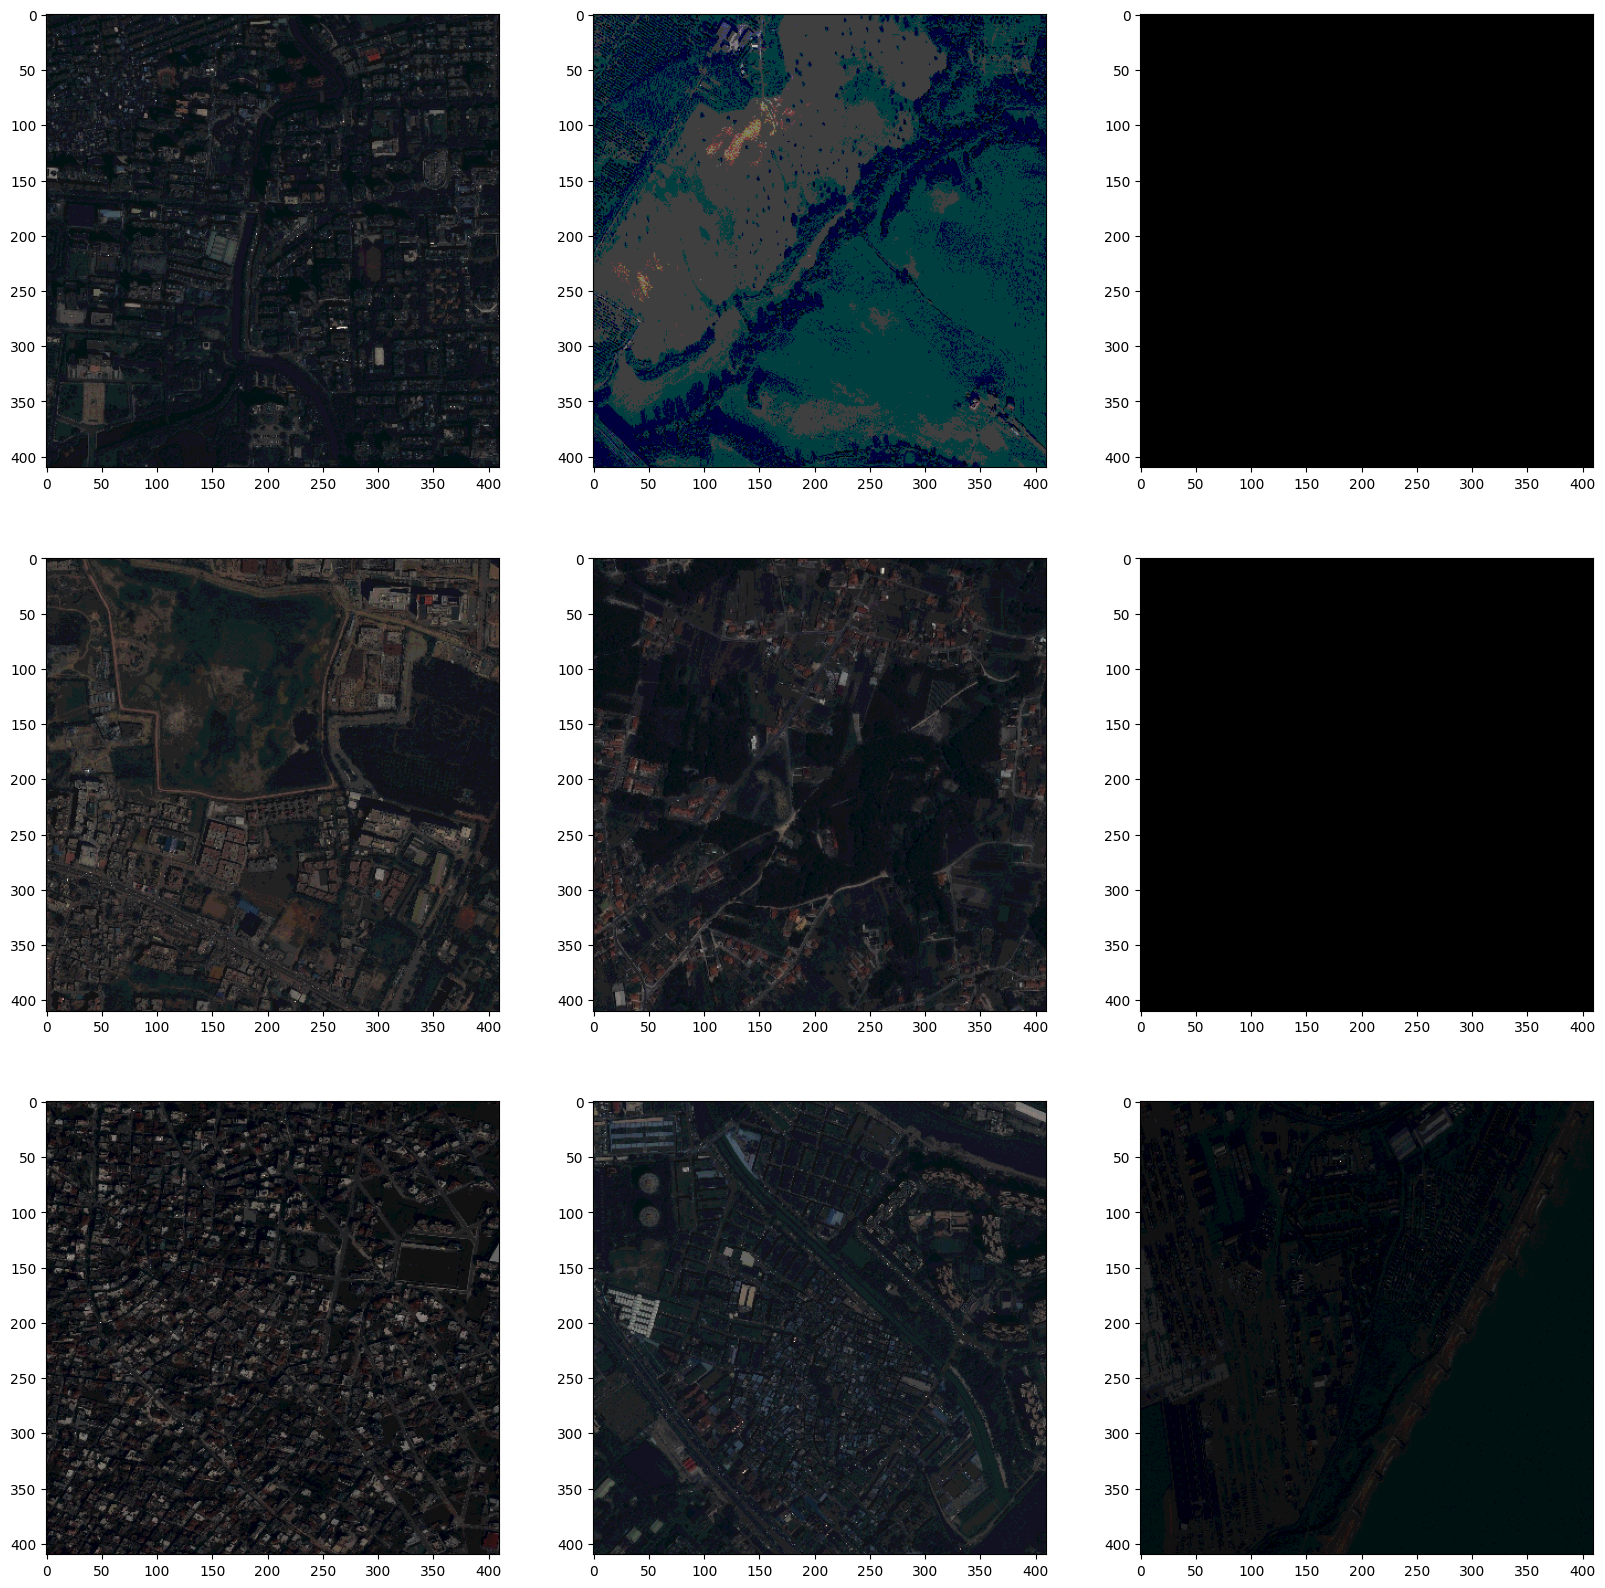

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

i = 0
sharp_output_path = os.path.join(train_path, "sharp")

plt.figure(figsize=(20, 20))
while i < 9:
    image = np.random.choice(os.listdir(sharp_output_path))
    if image[-3:] != "xml":
        i += 1
        plt.subplot(3, 3, i)
        tile = cv2.imread(os.path.join(sharp_output_path, image), cv2.IMREAD_UNCHANGED)
        tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
        plt.imshow(tile / np.amax(tile))
        print(tile.shape)
        print(np.amax(tile))

plt.show()

In [16]:
used_images = os.listdir(os.path.join(train_path, "sharp"))
used_images_names = [used_image.split("_")[0] for used_image in used_images]

all_images_names = [image_name.split("_")[0] for image_name in all_images]

unused_images = list(set(all_images_names).symmetric_difference(set(used_images_names)))
print(len(unused_images))
unused_images[: 10]

412


['P4275',
 'P0314',
 'P0478',
 'P4183',
 'P0446',
 'P0614',
 'P0722',
 'P2705',
 'P2134',
 'P1073']

In [15]:
train_perc = 0.8
train_split = round(train_perc * len(used_images))
train_images = sorted(used_images)[: train_split]
val_images = sorted(used_images)[train_split: ]

train_images = [train_image.split("_")[0] for train_image in train_images]
val_images = [val_image.split("_")[0] for val_image in val_images]

intersection = list(set(train_images).intersection(set(val_images)))
print(len(intersection))
print(len(train_images))
print(len(val_images))

1
10650
2662
